In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

yf.pdr_override()

y_symbols = ['^GSPC', '^MXX', '^FCHI','^NYA','^JKSE', '^RUT','^KS11' ]

start_date = dt.datetime(2000,1,1)
end_date = dt.datetime(2020,1,2)


In [2]:
def convert_to_USD(index_data, currency):
    # get historical conversion rate to USD
    tckr = yf.Ticker(currency+"USD=X")
    df = tckr.history(start=start_date, end=end_date)
    currency_data = df.resample('BMS').first()
    
    # convert the data
    for item in index_data.items():
        #print("before: " + str(item[1]))
        closest_date = currency_data.index[currency_data.index.get_loc(item[0], method='nearest')]
        exchange_rate = currency_data.loc[closest_date]["Open"]
        #print("exchange_rate: " + str(exchange_rate))
        index_data[item[0]] = item[1]*exchange_rate
        #print("after: " + str(index_data[item[0]]))
    
    return index_data

In [3]:
data = pdr.get_data_yahoo(y_symbols, start=start_date, end=end_date, interval='1mo')['Adj Close']

data["^FCHI"] = convert_to_USD(data["^FCHI"], "EUR")
data["^MXX"] = convert_to_USD(data["^MXX"], "MXN")
data["^JKSE"] = convert_to_USD(data["^JKSE"], "IDR")
data["^KS11"] = convert_to_USD(data["^KS11"], "KRW")


[*********************100%***********************]  7 of 7 completed


C:\Users\fiori\AppData\Local\Temp\ipykernel_4988\3919862828.py:10: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  closest_date = currency_data.index[currency_data.index.get_loc(item[0], method='nearest')]
C:\Users\fiori\AppData\Local\Temp\ipykernel_4988\3919862828.py:10: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  closest_date = currency_data.index[currency_data.index.get_loc(item[0], method='nearest')]
C:\Users\fiori\AppData\Local\Temp\ipykernel_4988\3919862828.py:10: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  closest_date = currency_data.index[currency_data.index.get_loc(item[0], method='nearest')]


In [4]:
data

,^FCHI,^GSPC,^JKSE,^KS11,^MXX,^NYA,^RUT
Date,,,,,,,
2000-01-01,6811.006068,1394.459961,0.055622,0.788340,589.184603,6574.009766,496.230011
2000-02-01,7450.190983,1366.420044,0.050393,0.691873,659.224671,6266.419922,577.710022
2000-03-01,7564.621943,1498.579956,0.050981,0.719068,668.591637,6848.609863,539.090027
2000-04-01,7725.480694,1452.430054,0.046039,0.605855,594.106075,6811.169922,506.250000
2000-05-01,7733.350379,1420.599976,0.039710,0.611275,533.311269,6805.250000,476.179993
...,...,...,...,...,...,...,...
2019-09-01,6240.427184,2976.739990,0.435118,1.705747,2140.460400,13004.740234,1523.369995
2019-10-01,6245.078868,3037.560059,0.437938,1.740221,2196.205403,13171.809570,1562.449951
2019-11-01,6587.870861,3140.979980,0.425586,1.787178,2226.101606,13545.209961,1624.500000


In [5]:
a = {}

In [6]:
# 10 years sliding window
sliding_windows_data = {}

for j in range(11):
    i=12 *j
    returns = (data / data.shift(1))[1+i:12*10 +i] 
    logReturn = np.log(returns)
    #var(aX) = a^2var(X), cov(aX, aX) = a^2 cov(X,X)
    yearly_mean = 12 * logReturn.mean()
    yearly_var = 12 * logReturn.var()
    yearly_std = np.sqrt(yearly_var)
    yearly_cov = 12 * logReturn.cov()

    sliding_windows_data[str(j+1) +'_yearly_mean'] = yearly_mean
    sliding_windows_data[str(j+1) +'_yearly_var'] = yearly_var
    sliding_windows_data[str(j+1) +'_yearly_std'] = yearly_std
    sliding_windows_data[str(j+1) +'_yearly_cov'] = yearly_cov

In [7]:
#expected yearly returns:
for j in range(11):
    print("SLIDING WINDOW ", j+1)
    print(sliding_windows_data[str(j+1) +'_yearly_mean'])
    print("____________________________________________________________")

SLIDING WINDOW  1
^FCHI   -0.014171
^GSPC   -0.022544
^JKSE    0.131009
^KS11    0.061436
^MXX     0.145157
^NYA     0.008961
^RUT     0.023328
dtype: float64
____________________________________________________________
SLIDING WINDOW  2
^FCHI   -0.038160
^GSPC   -0.008335
^JKSE    0.218437
^KS11    0.124104
^MXX     0.168452
^NYA     0.012764
^RUT     0.043645
dtype: float64
____________________________________________________________
SLIDING WINDOW  3
^FCHI   -0.023635
^GSPC    0.010771
^JKSE    0.205159
^KS11    0.094875
^MXX     0.149197
^NYA     0.020247
^RUT     0.043126
dtype: float64
____________________________________________________________
SLIDING WINDOW  4
^FCHI    0.029403
^GSPC    0.051513
^JKSE    0.211405
^KS11    0.135330
^MXX     0.186215
^NYA     0.055520
^RUT     0.083205
dtype: float64
____________________________________________________________
SLIDING WINDOW  5
^FCHI    0.024433
^GSPC    0.049521
^JKSE    0.142523
^KS11    0.099046
^MXX     0.136537
^NYA     0.0

In [8]:
#cov_matrices:
for j in range(11):
    print("SLIDING WINDOW ", j+1)
    print(sliding_windows_data[str(j+1) +'_yearly_cov'])
    print("____________________________________________________________")

SLIDING WINDOW  1
          ^FCHI     ^GSPC     ^JKSE     ^KS11      ^MXX      ^NYA      ^RUT
^FCHI  0.049806  0.030266  0.026973  0.043901  0.037011  0.029514  0.037037
^GSPC  0.030266  0.026898  0.020098  0.032241  0.030335  0.026041  0.029215
^JKSE  0.026973  0.020098  0.095920  0.057075  0.043570  0.023511  0.029088
^KS11  0.043901  0.032241  0.057075  0.096574  0.048179  0.031714  0.038048
^MXX   0.037011  0.030335  0.043570  0.048179  0.060982  0.029814  0.043266
^NYA   0.029514  0.026041  0.023511  0.031714  0.029814  0.027178  0.028480
^RUT   0.037037  0.029215  0.029088  0.038048  0.043266  0.028480  0.048064
____________________________________________________________
SLIDING WINDOW  2
          ^FCHI     ^GSPC     ^JKSE     ^KS11      ^MXX      ^NYA      ^RUT
^FCHI  0.053186  0.032035  0.025755  0.047606  0.038069  0.032161  0.037629
^GSPC  0.032035  0.027883  0.005419  0.031207  0.029539  0.027829  0.032200
^JKSE  0.025755  0.005419  1.205151  0.045923  0.044248  0.006367  

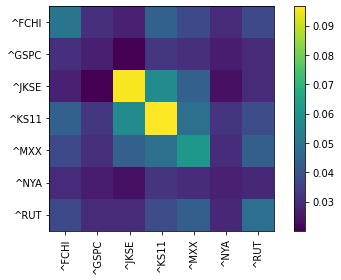

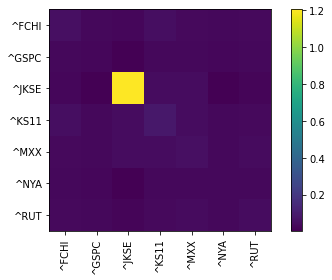

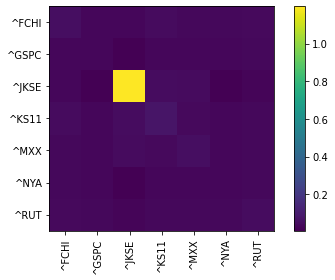

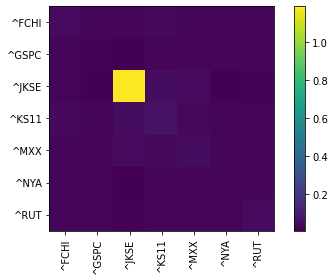

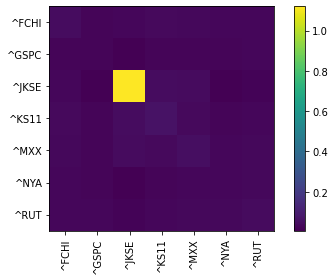

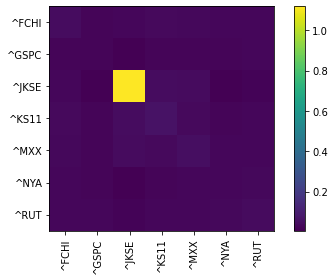

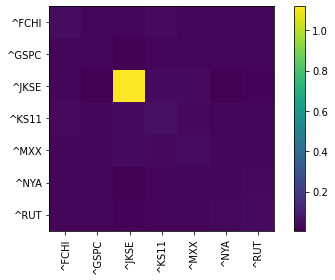

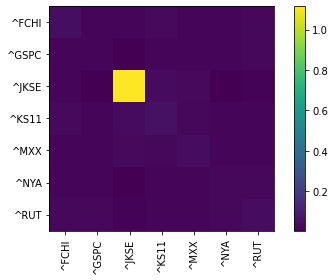

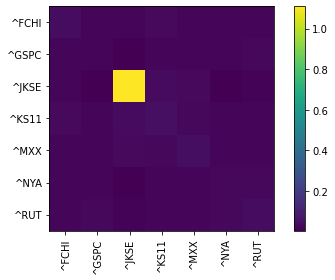

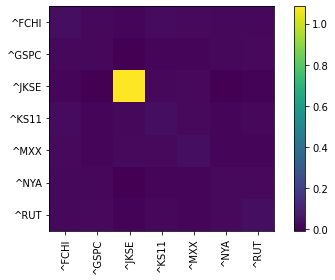

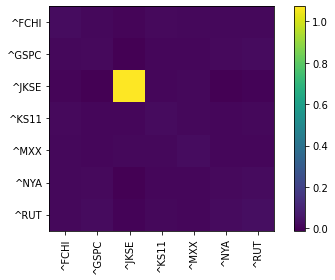

In [9]:
from pypfopt.plotting import plot_covariance
#cov_matrices:
for j in range(11):
    plot_covariance(sliding_windows_data[str(j+1) +'_yearly_cov'])

#### Efficient frontiers

C:\Users\fiori\AppData\Local\Temp\ipykernel_4988\1645145565.py:20: RuntimeWarning: invalid value encountered in divide
  weights /= np.sum(weights)


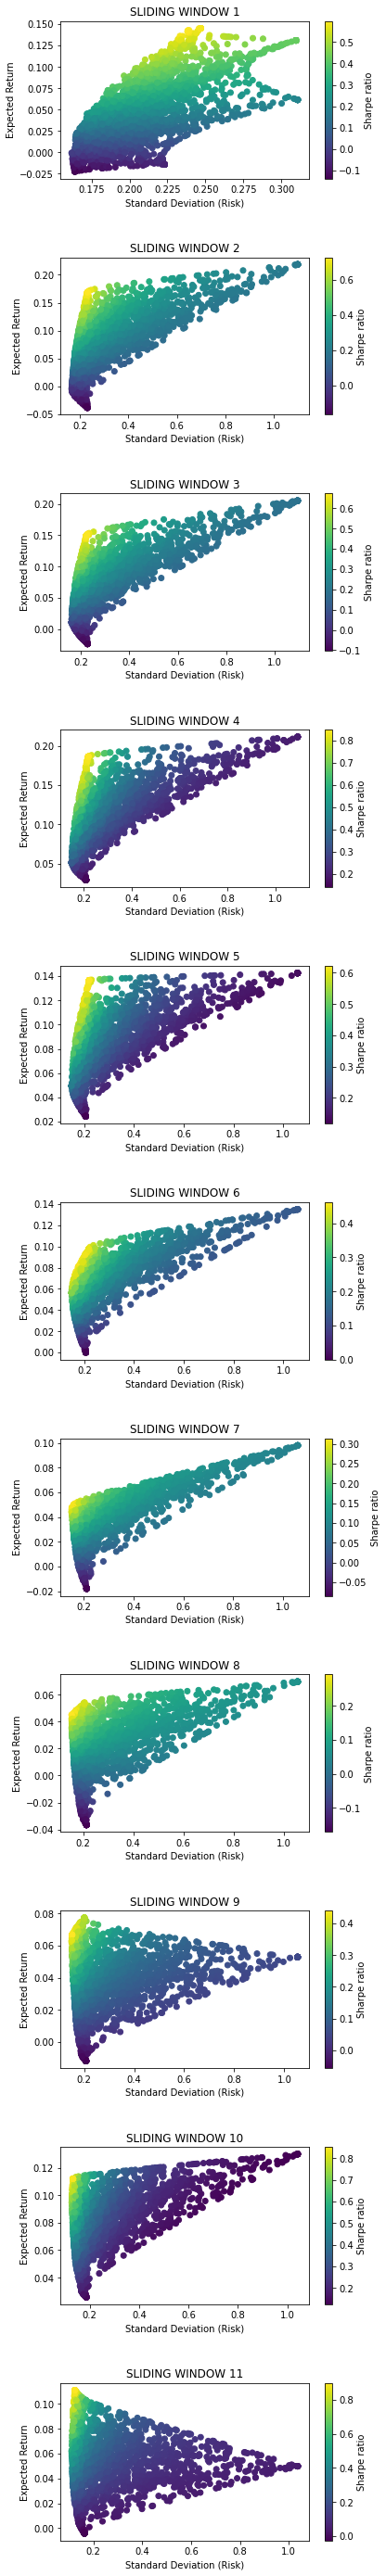

In [10]:
import numpy as np
import matplotlib.pyplot as plt

 #take a list of lists of frontier returns and variances
f_r = []
f_v = []
w = [] #append weights for each portfolio
frontiers_portfolios = []

for j in range(11):
    returns = sliding_windows_data[str(j+1) +'_yearly_mean']
    covariances = sliding_windows_data[str(j+1) +'_yearly_cov']

    frontier_mean_returns = []
    frontier_stds = []

    for i in range(3000):
        weights = np.random.normal(0, 1, size=7) #use normal distribution
        weights = [x if x >= 0 else 0 for x in weights]  
        weights /= np.sum(weights)
        if np.isnan(weights).any():
            continue
        portfolio_return = np.sum(returns * weights)
        portfolio_std = np.sqrt(np.dot(weights.T, np.dot(covariances, weights)))
        frontier_mean_returns.append(portfolio_return)
        frontier_stds.append(portfolio_std)
        w.append(weights)
    frontiers_portfolios.append(w)
    f_r.append(frontier_mean_returns)
    f_v.append(frontier_stds)
    

    
# Create a figure and a 3x3 grid of subplots
fig, axs = plt.subplots(11, figsize=(6, 50))

# Loop through the subplots and plot something on each of them
for i in range(11):
    im = axs[i].scatter(f_v[i], f_r[i], c=(np.array(f_r[i]) / np.array(f_v[i])))
    axs[i].set_xlabel('Standard Deviation (Risk)')
    axs[i].set_ylabel('Expected Return')
    plt.colorbar(im, ax=axs[i], label = 'Sharpe ratio')
    
count = 0
for ax in axs.flat:
    count +=1
    ax.set_title("SLIDING WINDOW " + str(count))

plt.subplots_adjust(wspace=0.5, hspace=0.5)
# Show the plot
plt.show()



In [11]:
#The results might change between runs because the points are computed at random

In [12]:
for i in range(len(f_r)):
    print("Highest return portfolio, Sliding Window ", i +1)
    print(frontiers_portfolios[i][np.argmax(f_r[i])])
    print("__________________________________________")

Highest return portfolio, Sliding Window  1
[0. 0. 0. 0. 1. 0. 0.]
__________________________________________
Highest return portfolio, Sliding Window  2
[0.         0.         0.23151583 0.10038928 0.         0.17687976
 0.49121513]
__________________________________________
Highest return portfolio, Sliding Window  3
[0.37092421 0.         0.45931158 0.         0.01643286 0.
 0.15333135]
__________________________________________
Highest return portfolio, Sliding Window  4
[0.         0.09040581 0.25418619 0.         0.         0.36859463
 0.28681337]
__________________________________________
Highest return portfolio, Sliding Window  5
[0.19614966 0.         0.29104386 0.28378215 0.12473538 0.
 0.10428895]
__________________________________________
Highest return portfolio, Sliding Window  6
[0.19984543 0.         0.34405121 0.16366745 0.29243591 0.
 0.        ]
__________________________________________
Highest return portfolio, Sliding Window  7
[0.13354247 0.         0.         0

In [13]:
# Less risky portfolio
for i in range(len(f_r)):
    print("Lowest risk portfolio, Sliding Window ", i +1)
    print(frontiers_portfolios[i][np.argmin(f_v[i])])
    print("__________________________________________")

Lowest risk portfolio, Sliding Window  1
[0.         0.63668636 0.083516   0.         0.         0.27979764
 0.        ]
__________________________________________
Lowest risk portfolio, Sliding Window  2
[0.         0.1801765  0.         0.10075455 0.18640014 0.42496893
 0.10769988]
__________________________________________
Lowest risk portfolio, Sliding Window  3
[0.03727236 0.         0.53221592 0.2588864  0.         0.
 0.17162533]
__________________________________________
Lowest risk portfolio, Sliding Window  4
[0.0419912  0.4394382  0.23658738 0.         0.15846511 0.12351811
 0.        ]
__________________________________________
Lowest risk portfolio, Sliding Window  5
[0.4364998 0.        0.        0.5159755 0.        0.0475247 0.       ]
__________________________________________
Lowest risk portfolio, Sliding Window  6
[0.         0.49380806 0.         0.49190216 0.         0.01428978
 0.        ]
__________________________________________
Lowest risk portfolio, Sliding W

In [14]:
#Highest sharpe ratio

for i in range(11):
    SharpeR = np.array(f_r[i]) / np.array(f_v[i])
    print("Highest Sharpe-ratio portfolio, Sliding Window ", i +1)
    print(frontiers_portfolios[i][np.argmax(SharpeR)])
    print("__________________________________________")

Highest Sharpe-ratio portfolio, Sliding Window  1
[0.         0.         0.15753832 0.         0.84246168 0.
 0.        ]
__________________________________________
Highest Sharpe-ratio portfolio, Sliding Window  2
[0.         0.26451939 0.         0.03010297 0.16331547 0.25973873
 0.28232344]
__________________________________________
Highest Sharpe-ratio portfolio, Sliding Window  3
[0.         0.         0.12420322 0.87579678 0.         0.
 0.        ]
__________________________________________
Highest Sharpe-ratio portfolio, Sliding Window  4
[0. 0. 0. 0. 0. 1. 0.]
__________________________________________
Highest Sharpe-ratio portfolio, Sliding Window  5
[0.         0.         0.15753832 0.         0.84246168 0.
 0.        ]
__________________________________________
Highest Sharpe-ratio portfolio, Sliding Window  6
[0.22732896 0.         0.         0.         0.         0.77267104
 0.        ]
__________________________________________
Highest Sharpe-ratio portfolio, Sliding Win

# Let's try to replicate the previous efficient frontiers with a library

In [15]:
!pip install PyPortfolioOpt

Defaulting to user installation because normal site-packages is not writeable


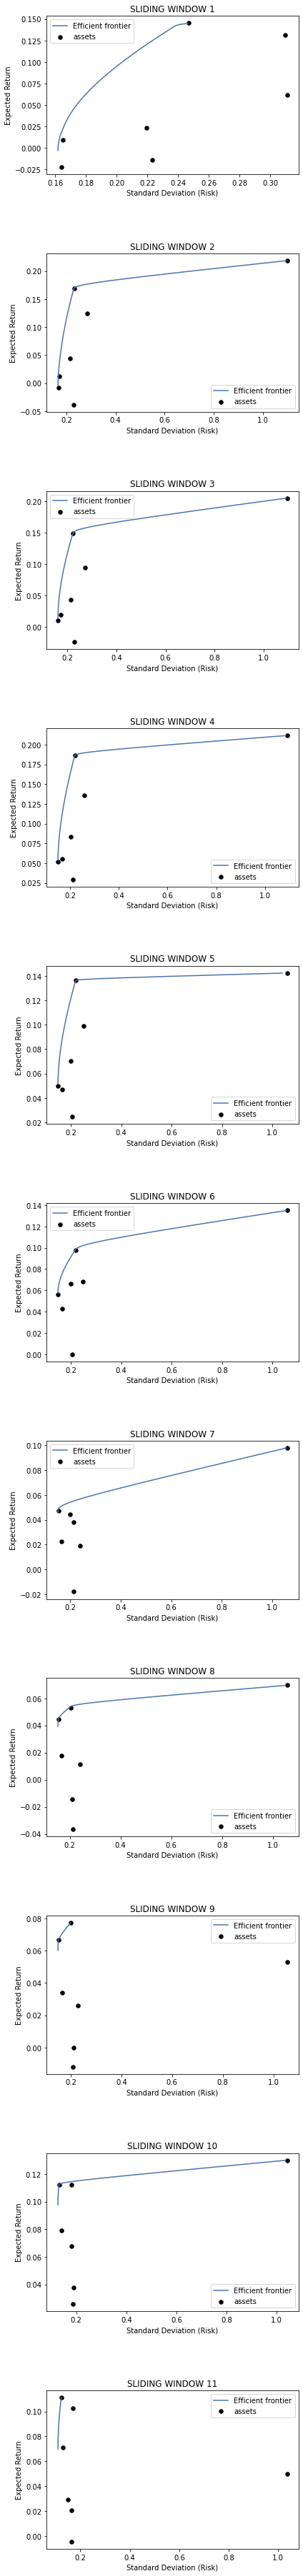

In [18]:
from pypfopt import EfficientFrontier
from pypfopt import plotting

# Create a figure and a 3x3 grid of subplots
fig, axs = plt.subplots(11, figsize=(6, 50))

# Loop through the subplots and plot something on each of them
for i in range(11):
    ef = EfficientFrontier(sliding_windows_data[str(i+1)+'_yearly_mean'], sliding_windows_data[str(i+1)+'_yearly_cov'], weight_bounds=(0, 1))
    plotting.plot_efficient_frontier(ef, ax=axs[i], show_assets=True)
    axs[i].set_xlabel('Standard Deviation (Risk)')
    axs[i].set_ylabel('Expected Return')
    
count = 0
for ax in axs.flat:
    count +=1
    ax.set_title("SLIDING WINDOW " + str(count))

plt.subplots_adjust(wspace=0.5, hspace=0.5)
# Show the plot
plt.show()

### The results are the same, we can use the library to use compute the efficient frontier with risk free rate 1

## Efficient frontier risk free rate

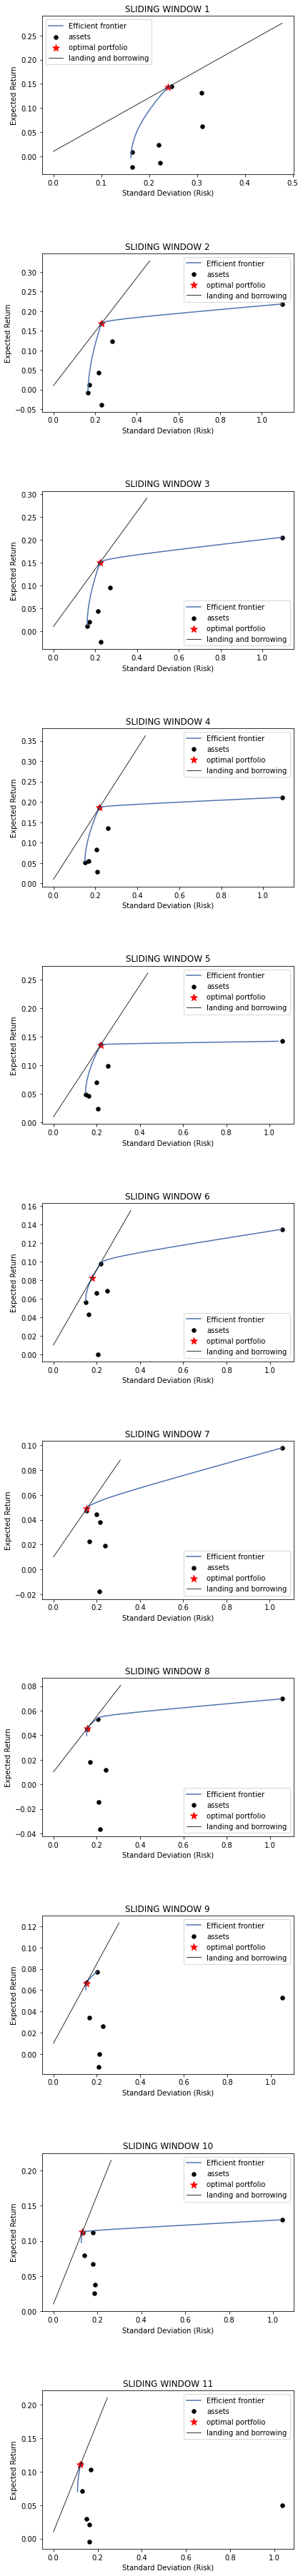

In [19]:
Rf = 0.01


fig, axs = plt.subplots(11, figsize=(6, 50))

# Loop through the subplots and plot something on each of them
for i in range(11):
    ef = EfficientFrontier(sliding_windows_data[str(i+1)+'_yearly_mean'], sliding_windows_data[str(i+1)+'_yearly_cov'], weight_bounds=(0, 1))
    plotting.plot_efficient_frontier(ef, ax=axs[i], show_assets=True)
    #need to create another instance
    ef2 = EfficientFrontier(sliding_windows_data[str(i+1)+'_yearly_mean'], sliding_windows_data[str(i+1)+'_yearly_cov'], weight_bounds=(0, 1))
    Best_portfolio = ef2.max_sharpe(risk_free_rate=0) #best portfolio weights
    stats = ef2.portfolio_performance(verbose=False, risk_free_rate=0)
    Rp = stats[0]
    sigma = stats[1]
    
    xs = np.linspace(0, 2)
    sigma_c = xs * sigma # slide 22 ch05
    Rc = Rf + (Rp - Rf)/sigma * sigma_c
    
    
    opt = axs[i].scatter(sigma, Rp, marker = '*', c = 'red', s=100, label = 'optimal portfolio')#best performance portfolio
    line1, = axs[i].plot(sigma_c, Rc, "-", color="k", linewidth=0.8, label = 'landing and borrowing')
    axs[i].set_xlabel('Standard Deviation (Risk)')
    axs[i].set_ylabel('Expected Return')
    axs[i].legend()
    
count = 0
for ax in axs.flat:
    count +=1
    ax.set_title("SLIDING WINDOW " + str(count))

plt.subplots_adjust(wspace=0.5, hspace=0.5)
# Show the plot
plt.show()
